In [ ]:
import json
token = {"username":"gaojun123","key":"bef9281dc9d8baf163062f4c7e7b0e5c"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
import yaml

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zehraatlgan/fish-detection")
print("Path to dataset files:", path)
import shutil

# 假设 `path` 是数据集的下载路径
destination_path = "/content//"

# 移动下载的文件到目标路径
shutil.move(path, destination_path)
print(f"Dataset moved to: {destination_path}")

Path to dataset files: /root/.cache/kagglehub/datasets/zehraatlgan/fish-detection/versions/1
Dataset moved to: /content//


In [ ]:
# Path to the dataset
dataset_path = '/content/1'

# Initialize a dictionary to count the number of files in each subset
subset_counts = {'train': 0, 'test': 0, 'valid': 0}

# Walk through train, test, and valid directories to count files
for subset in ['train', 'test', 'valid']:
    subset_path = os.path.join(dataset_path, subset)
    for dirname, _, filenames in os.walk(subset_path):
        for filename in filenames:
            if filename.endswith('.txt'):  # Only count .txt files
                subset_counts[subset] += 1

# Print the number of images in each subset (train, test, valid)
print(f"Training set size: {subset_counts['train']}")
print(f"Test set size: {subset_counts['test']}")
print(f"Validation set size: {subset_counts['valid']}")

Training set size: 6842
Test set size: 700
Validation set size: 700


<ipython-input-12-cc3bd03bd3f5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")  # 颜色主题


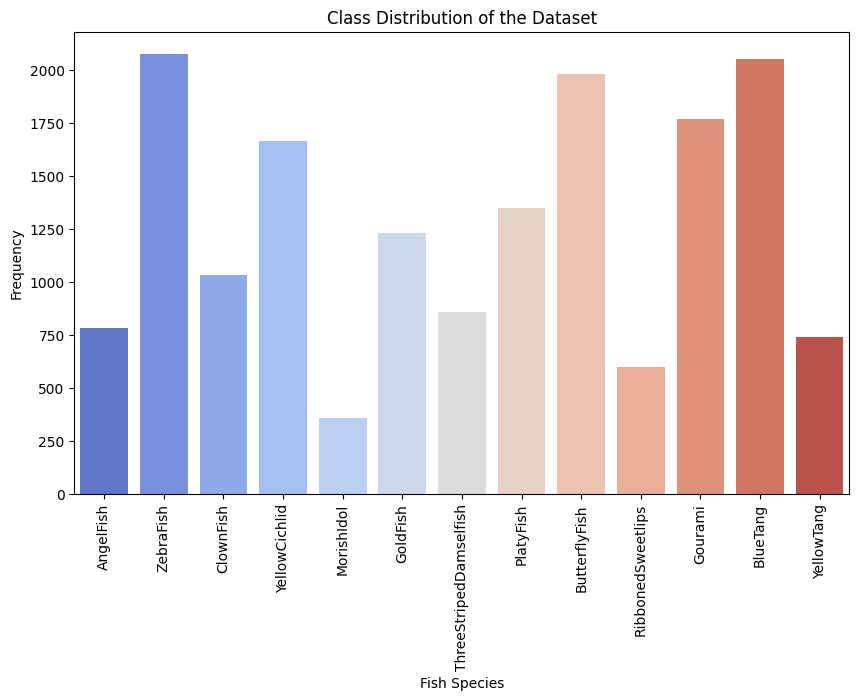

In [ ]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Read class names from the data.yaml file
with open(os.path.join(dataset_path, 'data.yaml'), 'r') as file:
    class_names = yaml.safe_load(file)['names']

# Collect label IDs from .txt files in train, test, and valid directories
labels = [
    int(line.split()[0])
    for subset in ['train', 'test', 'valid']
    for dirname, _, filenames in os.walk(os.path.join(dataset_path, subset))
    for filename in filenames if filename.endswith('.txt')
    for line in open(os.path.join(dirname, filename)).readlines() if line.strip()
]

# Count occurrences of each class
class_counts = Counter(class_names[label] for label in labels)

# Set pastel color palette
sns.set_palette("pastel")

# Plot class distribution with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")  # 颜色主题
plt.xlabel('Fish Species')
plt.ylabel('Frequency')
plt.title('Class Distribution of the Dataset')
plt.xticks(rotation=90)
plt.show()

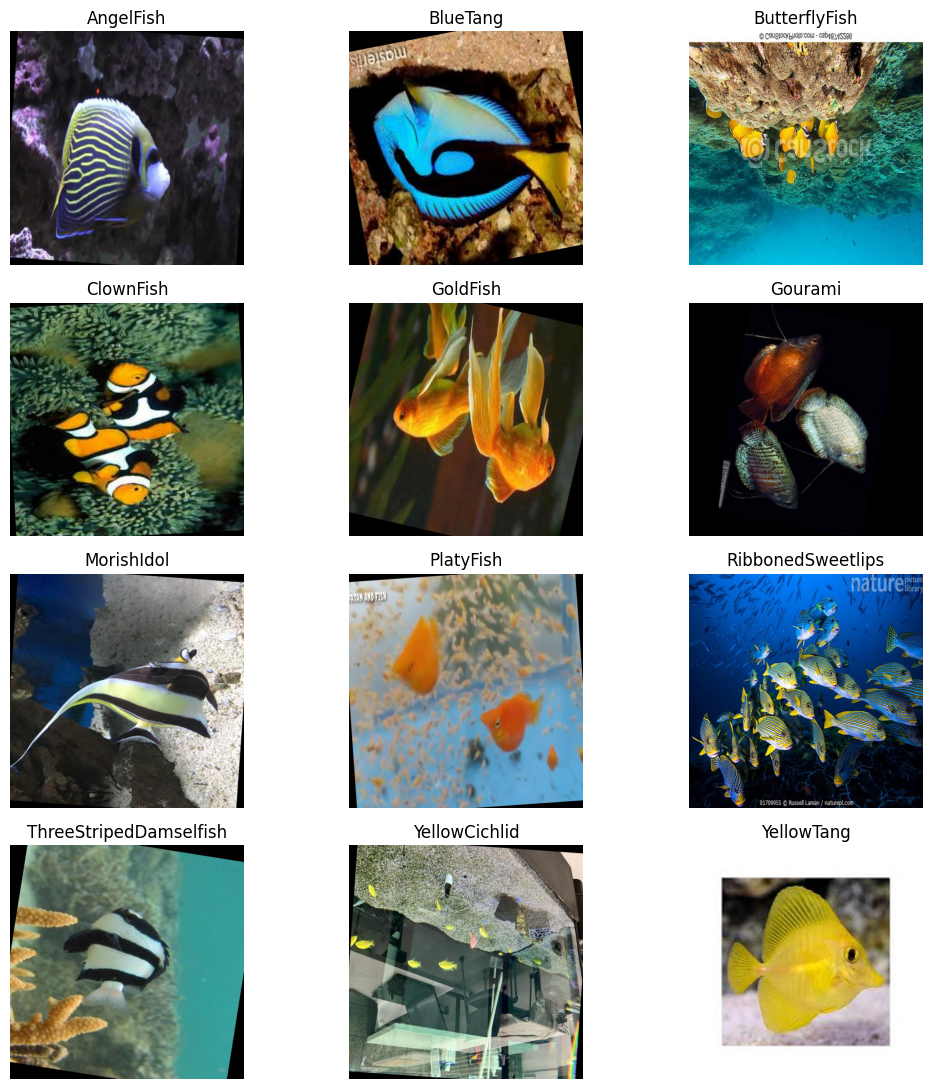

In [ ]:
import cv2
import random
import os
# Paths
train_img_dir = '/content/1/train/images'
train_labels_dir = '/content/1/train/labels'
yaml_path = '/content/1/data.yaml'

# Load class names
with open(yaml_path, 'r') as f:
    label_list = yaml.safe_load(f)['names']

# Group images by class
images_by_class = {class_name: [] for class_name in label_list}
for img_name in os.listdir(train_img_dir):
    label_file = os.path.join(train_labels_dir, img_name[:-3] + 'txt')
    if os.path.exists(label_file) and open(label_file).read().strip():
        class_id = int(open(label_file).read().split()[0])
        images_by_class[label_list[class_id]].append(img_name)

# Select random images from each class
random_images = [random.choice(imgs) for imgs in images_by_class.values() if imgs][:12]

# Display random images
fig, axes = plt.subplots(4, 3, figsize=(11, 11))
for i, img_name in enumerate(random_images):
    ax = axes[i // 3, i % 3]
    img = cv2.cvtColor(cv2.imread(os.path.join(train_img_dir, img_name)), cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    class_id = int(open(os.path.join(train_labels_dir, img_name[:-3] + 'txt')).read().split()[0])
    ax.set_title(label_list[class_id])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 36.2/235.7 GB disk)


In [ ]:
from ultralytics import YOLO
model= YOLO('yolo11m.pt')

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data='/content/1/data.yaml' epochs=30 imgsz=640 plots=True

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh